In [1]:
################################################
## setup to use GPU TensorFlow on Colab -- cwr
################################################

%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [2]:
!ls /

bin	 datalab  home	 lib64	opt	    root  srv		     tmp    var
boot	 dev	  lib	 media	proc	    run   sys		     tools
content  etc	  lib32  mnt	python-apt  sbin  tensorflow-1.15.2  usr


In [3]:
!ls /content/drive/

MyDrive


In [4]:
!ls /content/drive/MyDrive/PredatorEye/fcd_training_set/

azXzjfBAVH_816_668.jpeg  pngeVHaCDF_230_820.jpeg  test.txt
foo.txt			 QJvCUSOVWk_414_713.jpeg  uNFOorIfEt_149_234.jpeg
hSCjLPGMQT_483_314.jpeg  qrXKbdMILt_343_433.jpeg  vkbrxedwxK_825_668.jpeg
hTqTdsFhNv_844_420.jpeg  sXFdGeQwiF_777_456.jpeg


In [5]:
with open('/content/drive/My Drive/PredatorEye/fcd_training_set/foo.txt', 'w') as f:
  f.write('Hello Google Drive!')
!cat /content/drive/My\ Drive/PredatorEye/fcd_training_set/foo.txt

Hello Google Drive!

In [1]:
# check Pillow version number
import PIL
print('Pillow Version:', PIL.__version__)

Pillow Version: 7.1.2


In [2]:
# load and show an image with Pillow
from PIL import Image
test_path = '/content/drive/MyDrive/PredatorEye/fcd_training_set/azXzjfBAVH_816_668.jpeg'
# load the image
image = Image.open(test_path)
# summarize some details about the image
print(image.format)
print(image.mode)
print(image.size)
# show the image
#image.show()

JPEG
RGB
(1024, 1024)


uint8
(1024, 1024, 3)


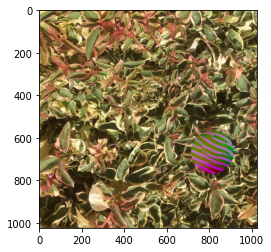

In [3]:
# load and display an image with Matplotlib
from matplotlib import image
from matplotlib import pyplot
# load image as pixel array
test_path = '/content/drive/MyDrive/PredatorEye/fcd_training_set/azXzjfBAVH_816_668.jpeg'
data = image.imread(test_path)
# summarize shape of the pixel array
print(data.dtype)
print(data.shape)
# display the array of pixels as an image
pyplot.imshow(data)
pyplot.show()